In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)
f, genfun, phi = symbols('f genfun phi', cls=Function)
genfun = 1/sqrt(1+x**2-2*x*cos(theta))
getfunc_trunc = (genfun.series(x,0,4)).removeO()
getfunc_trunc

x**3*(5*cos(theta)**3/2 - 3*cos(theta)/2) + x**2*(3*cos(theta)**2/2 - 1/2) + x*cos(theta) + 1

In [3]:
[getfunc_trunc.coeff(x,i).factor() for i in range(4)]

[1, cos(theta), (3*cos(theta)**2 - 1)/2, (5*cos(theta)**2 - 3)*cos(theta)/2]

In [4]:
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(4)]
integral = integrate(getfunc_trunc, (theta, 0, pi))
integral

pi*x**2/4 + pi

In [5]:
phi = -2*mu*G*integral
phi

-2*G*mu*(pi*x**2/4 + pi)

In [6]:
# substitute mu expressed via M, R, and r in phi
potential = phi.subs({mu:M/(2*pi*R), x:r/R})
print ("The gravitational potential of the ring is")
potential

The gravitational potential of the ring is


-G*M*(pi + pi*r**2/(4*R**2))/(pi*R)

In [7]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RE = 1.496e11  # radius of earths's orbit in m

fJS = (potential.subs({G:GN, M:MJ, R:RJ, r:RE, R:RJ}))

print (f"The gravitational potential of Jupiter's ring \
at Earths's orbit is {round(fJS)} SI units")

The gravitational potential of Jupiter's ring at Earths's orbit is -164410 SI units


In [8]:
def discrete_phi(N, M, R, r):
    Mi = M/N
    alpha = 2*np.pi/N
    
    total = 0
    for n in range(N):
        # calculate distance between earth and each mass
        x_n = R * cos(n * alpha)
        y_n = R * sin(n * alpha)
        distance = sqrt((x_n-r)**2 + y_n**2)
        
        total += -GN*Mi / distance
    
    return total

In [9]:
def approx(m1, r1, r2):
    xs = []
    ys = []
    i = 2
    last = 999
    while True:
        y = discrete_phi(i, m1, r1, r2)
        xs.append(i)
        ys.append(y)    
        if abs(last-y) < 1/1e4 or i > 100000:
            break
        last = y
        i *= 2
    return i, y


In [14]:
i, y = approx(MJ, RJ, RE)
print(f"Broke at i={i} masses with a potential of {round(y)} SI units.\nThis result is close to part (b) ")

Broke at i=32 masses with a potential of -164442 SI units.
This result is close to part (b) 


In [11]:
rs = []
diffs = []
phi_0 = approx(MJ, RJ, 0)[1]
for scale in [0, 0.2, 0.4, 0.6, 0.8]:
    i, y = approx(MJ, RJ, RE*scale)
    rs.append(RE*scale)
    diffs.append(abs(y - phi_0))

In [12]:
rs = np.array(rs, dtype='float')
diffs = np.array(diffs, dtype='float')
x2, x1, x0 = np.polyfit(rs, diffs, 2)
dom = np.linspace(0, rs[-1])

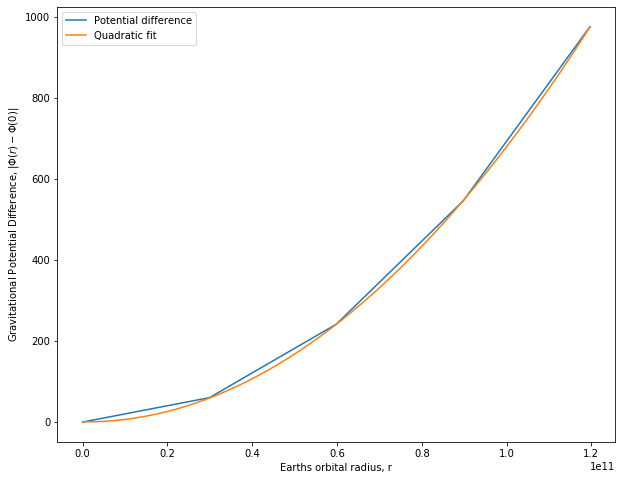

We see that this resembles a quadratic relation.


In [13]:
plt.figure(figsize=(10,8))
plt.plot(rs, diffs, label="Potential difference")
plt.plot(dom, x2*dom**2 + x1*dom + x0, label="Quadratic fit")
plt.xlabel("Earths orbital radius, r")
plt.ylabel("Gravitational Potential Difference, $|\Phi (r)-\Phi (0)|$")
plt.legend()
plt.show()
print("We see that this resembles a quadratic relation.")